# Data Collection – SpaceX API

In [20]:
import requests
import pandas as pd

# Define the SpaceX API endpoint
spacex_api_url = "https://api.spacexdata.com/v4/launches"

# Step 1: Send a GET request to the SpaceX API
response = requests.get(spacex_api_url)

# Step 2: Check if the request was successful
if response.status_code == 200:
    # Step 3: Convert the JSON response to a pandas DataFrame
    launches_data = response.json()
    spacex_df = pd.DataFrame(launches_data)

    # Step 4: Extract relevant columns (customize based on your analysis needs)
    columns_to_keep = ['flight_number', 'name', 'date_utc', 'success', 'rocket', 'payloads', 'launchpad']
    spacex_df = spacex_df[columns_to_keep]

    # Step 5: Save the data to a CSV file
    spacex_df.to_csv("spacex_launch_data.csv", index=False)
    print("SpaceX API data collection successful. Data saved as 'spacex_launch_data.csv'.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")


SpaceX API data collection successful. Data saved as 'spacex_launch_data.csv'.


# Data Collection - Scraping

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Define the target webpage URL (not an API endpoint)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv" 

# Step 2: Send an HTTP GET request to the webpage
try:
    response = requests.get(url, timeout=10)  # Set a timeout for the request
    response.raise_for_status()  # Raise an error for bad HTTP responses

    # Step 3: Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Step 4: Extract the table containing SpaceX data (adjust selectors as needed)
    table = soup.find('table')  # Replace with the actual table tag or structure
    if table:
        data = []
        rows = table.find_all('tr')  # Get all rows in the table
        for row in rows:
            cells = row.find_all('td')  # Extract table data cells
            data.append([cell.text.strip() for cell in cells])

        # Step 5: Create a DataFrame from the extracted data
        column_headers = [header.text.strip() for header in table.find_all('th')]  # Extract column headers
        spacex_data = pd.DataFrame(data, columns=column_headers)

        # Step 6: Save the DataFrame to a CSV file
        spacex_data.to_csv("spacex_web_scraped_data.csv", index=False)
        print("Web scraping successful. Data saved as 'spacex_web_scraped_data.csv'.")
    else:
        print("No table found on the webpage. Please check the structure.")

except requests.exceptions.RequestException as e:
    print(f"An error occurred while fetching the webpage: {e}")


No table found on the webpage. Please check the structure.


# Data Wrangling

In [23]:
import pandas as pd

# Load the dataset
spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")

# Step 1: Check column names to ensure the columns exist
print("Columns in the dataset:", spacex_df.columns)

# Step 2: Handle missing values
spacex_df.dropna(inplace=True)  # Drop rows with missing values

# Step 3: Convert categorical columns to numerical (one-hot encoding)
categorical_columns = ['LaunchSite', 'Orbit', 'LandingPad', 'MissionOutcome']

# Check if the columns exist in the dataframe
existing_columns = [col for col in categorical_columns if col in spacex_df.columns]
missing_columns = list(set(categorical_columns) - set(existing_columns))

if existing_columns:
    spacex_df = pd.get_dummies(spacex_df, columns=existing_columns, drop_first=True)
else:
    print(f"Missing columns: {missing_columns} - Cannot perform one-hot encoding")

# Step 4: Standardize numerical columns (e.g., PayloadMass)
if 'PayloadMass' in spacex_df.columns:
    spacex_df['PayloadMass'] = (spacex_df['PayloadMass'] - spacex_df['PayloadMass'].mean()) / spacex_df['PayloadMass'].std()

# Save the processed data
spacex_df.to_csv("spacex_processed_data.csv", index=False)
print("Data wrangling complete. Processed data saved as 'spacex_processed_data.csv'.")


Columns in the dataset: Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')
Data wrangling complete. Processed data saved as 'spacex_processed_data.csv'.


# EDA with Data Visualization

Columns in the dataset: Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')


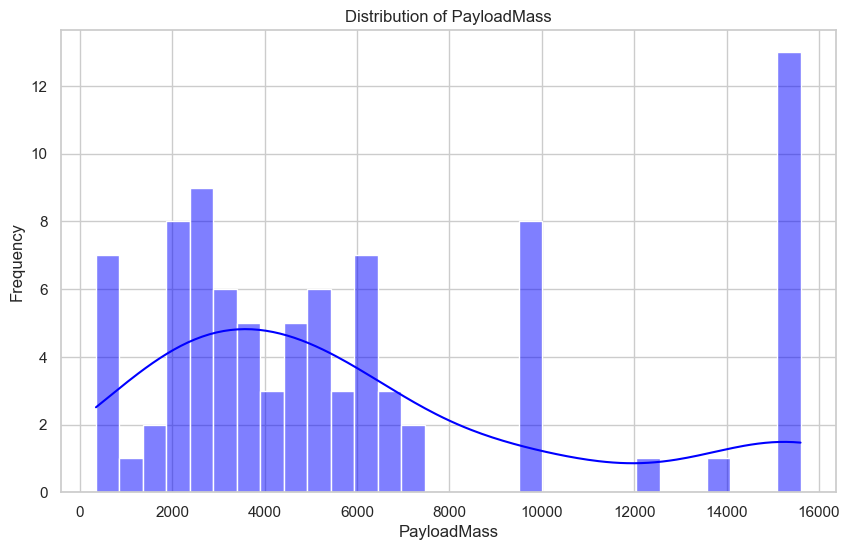

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Check column names
print("Columns in the dataset:", spacex_df.columns)

# Verify if 'PayloadMass' exists
if 'PayloadMass' in spacex_df.columns:
    # 1. Histogram for distribution of PayloadMass
    plt.figure(figsize=(10, 6))
    sns.histplot(spacex_df['PayloadMass'], kde=True, bins=30, color='blue')
    plt.title('Distribution of PayloadMass')
    plt.xlabel('PayloadMass')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'PayloadMass' does not exist in the dataset. Please check the column names.")


# EDA with SQL

In [31]:
import sqlite3
import pandas as pd

# Load the dataset into a DataFrame
spacex_df = pd.read_csv("spacex_launch_data.csv")

# Create an SQLite database in memory and load the DataFrame
conn = sqlite3.connect(':memory:')
spacex_df.to_sql('spacex', conn, index=False, if_exists='replace')

# 1. Select all data to inspect schema
query_1 = "SELECT * FROM spacex LIMIT 5;"
print("Query 1 Result:")
print(pd.read_sql(query_1, conn))

# 2. Filter successful launches by launchpad
query_2 = """
SELECT launchpad, COUNT(*) AS Successful_Launches 
FROM spacex 
WHERE success = 1 
GROUP BY launchpad;
"""
print("\nQuery 2 Result:")
print(pd.read_sql(query_2, conn))

# 3. Calculate average payload count for each rocket
query_3 = """
SELECT rocket, AVG(length(payloads) - length(replace(payloads, ',', '')) + 1) AS Avg_Payload_Count
FROM spacex 
GROUP BY rocket;
"""
print("\nQuery 3 Result:")
print(pd.read_sql(query_3, conn))

# 4. Identify the most frequently used rocket for successful launches
query_4 = """
SELECT rocket, COUNT(*) AS Usage_Count 
FROM spacex 
WHERE success = 1 
GROUP BY rocket 
ORDER BY Usage_Count DESC 
LIMIT 1;
"""
print("\nQuery 4 Result:")
print(pd.read_sql(query_4, conn))

# 5. Count total number of launches grouped by year
query_5 = """
SELECT strftime('%Y', date_utc) AS Launch_Year, COUNT(*) AS Total_Launches 
FROM spacex 
GROUP BY Launch_Year 
ORDER BY Launch_Year;
"""
print("\nQuery 5 Result:")
print(pd.read_sql(query_5, conn))

# Close the connection
conn.close()


Query 1 Result:
   flight_number         name                  date_utc  success  \
0              1    FalconSat  2006-03-24T22:30:00.000Z        0   
1              2      DemoSat  2007-03-21T01:10:00.000Z        0   
2              3  Trailblazer  2008-08-03T03:34:00.000Z        0   
3              4       RatSat  2008-09-28T23:15:00.000Z        1   
4              5     RazakSat  2009-07-13T03:35:00.000Z        1   

                     rocket  \
0  5e9d0d95eda69955f709d1eb   
1  5e9d0d95eda69955f709d1eb   
2  5e9d0d95eda69955f709d1eb   
3  5e9d0d95eda69955f709d1eb   
4  5e9d0d95eda69955f709d1eb   

                                            payloads                 launchpad  
0                       ['5eb0e4b5b6c3bb0006eeb1e1']  5e9e4502f5090995de566f86  
1                       ['5eb0e4b6b6c3bb0006eeb1e2']  5e9e4502f5090995de566f86  
2  ['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00...  5e9e4502f5090995de566f86  
3                       ['5eb0e4b7b6c3bb0006eeb1e5']  5e9e4502f5

# Build an Interactive Map with Folium

In [39]:
import folium

# Create a base map
m = folium.Map(location=[34.0522, -118.2437], zoom_start=5)

# Add marker
folium.Marker([34.0522, -118.2437], popup='Launch Site 1').add_to(m)

# Add circle
folium.Circle([34.0522, -118.2437], radius=50000, color='blue', fill=True).add_to(m)

# Add line
folium.PolyLine([(34.0522, -118.2437), (36.1699, -115.1398)], color='red').add_to(m)

# Add a popup to the circle
folium.Popup('Launch Impact Area', parse_html=True).add_to(folium.Circle([34.0522, -118.2437], radius=50000, color='blue', fill=True))

# Display map
m.save('interactive_map.html')

# To automatically open the map in a browser (works for most environments)
import webbrowser
webbrowser.open('interactive_map.html')


True

# Build a Dashboard with Plotly Dash

In [67]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')

# Initialize Dash app
app = dash.Dash(__name__)

# Create a bar chart for success by launch pad
bar_chart = px.bar(
    df, 
    x='launchpad', 
    y='success', 
    title="Launch Success by Site"
)

# Create a line chart for success trends over time
line_chart = px.line(
    df, 
    x='date_utc', 
    y='success', 
    title="Launch Success Over Time"
)

# Layout with dropdown filters and charts
app.layout = html.Div([
    # Dropdown for launch site
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in df['launchpad'].unique()],
        multi=True,
        placeholder="Select Launch Site"
    ),
    # Dropdown for year selection
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in pd.to_datetime(df['date_utc']).dt.year.unique()],
        multi=True,
        placeholder="Select Year"
    ),
    # Bar chart for success by site
    dcc.Graph(id='bar-chart', figure=bar_chart),
    # Line chart for success trends
    dcc.Graph(id='line-chart', figure=line_chart)
])

# Run the Dash server
if __name__ == '__main__':
    app.run_server(debug=True)


# Flight Number vs. Launch Site

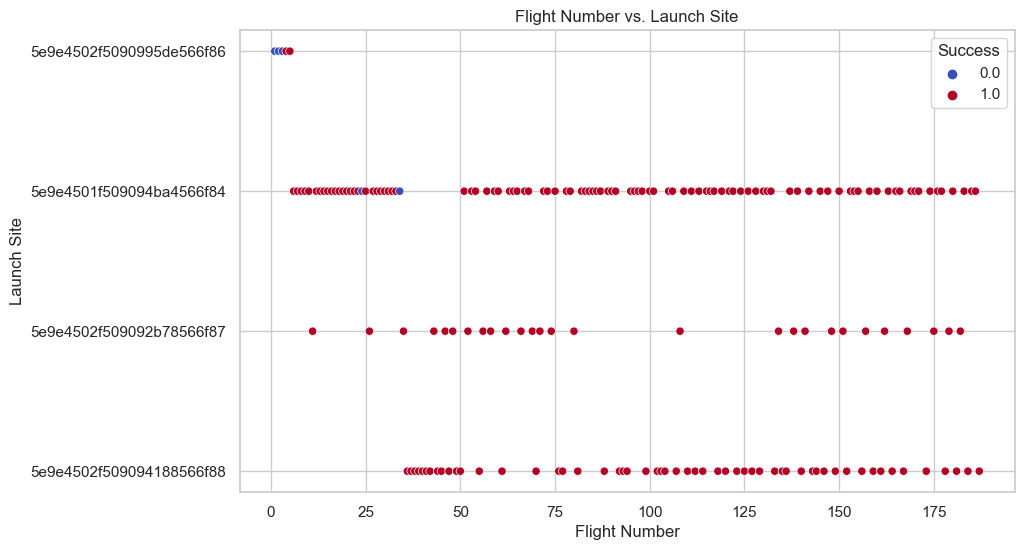

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flight_number', y='launchpad', hue='success', palette='coolwarm')
plt.title('Flight Number vs. Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.legend(title="Success")
plt.grid(True)
plt.show()

# Payload vs. Launch Site

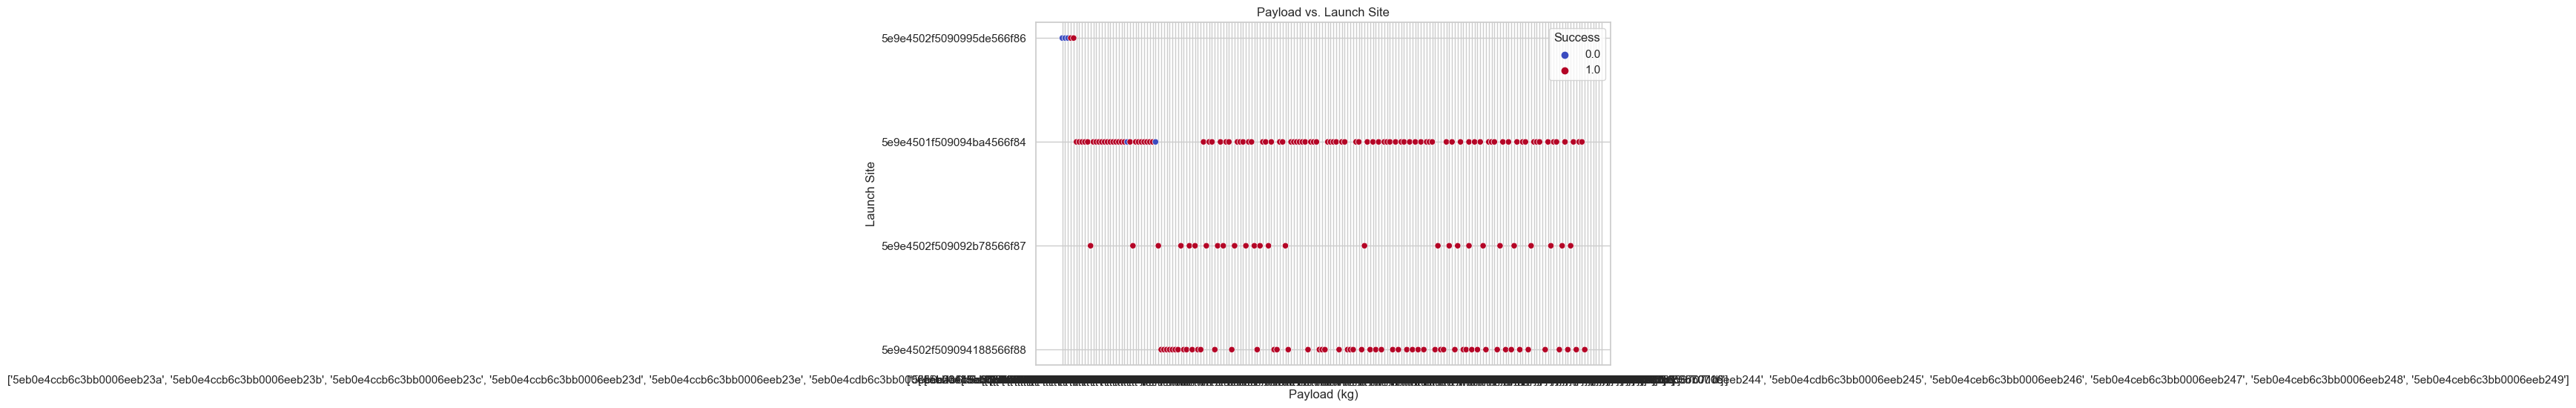

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='payloads', y='launchpad', hue='success', palette='coolwarm')
plt.title('Payload vs. Launch Site')
plt.xlabel('Payload (kg)')
plt.ylabel('Launch Site')
plt.legend(title="Success")
plt.grid(True)
plt.show()

# Success Rate vs. Orbit Type

Index(['flight_number', 'name', 'date_utc', 'success', 'rocket', 'payloads',
       'launchpad'],
      dtype='object')


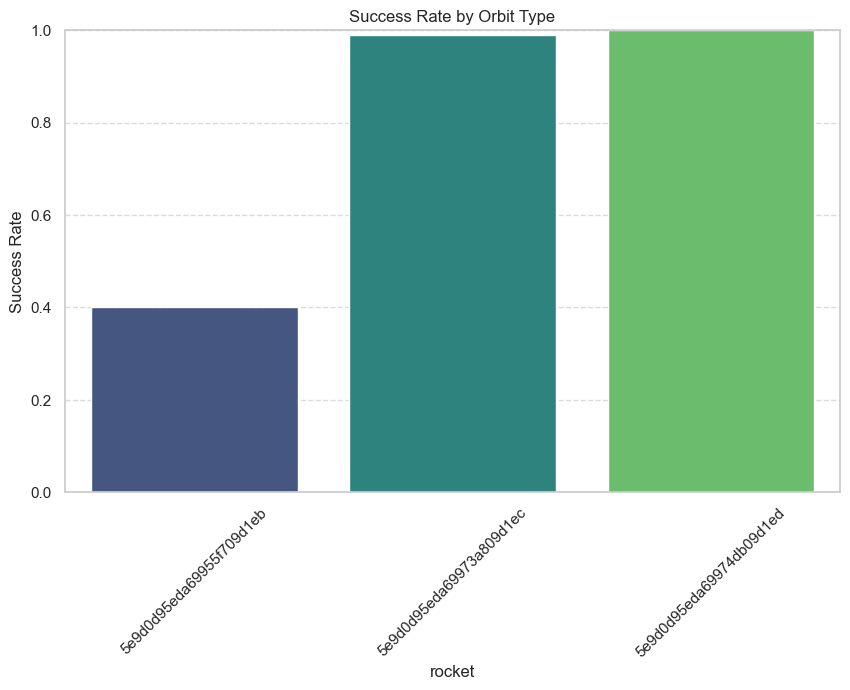

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')

# Verify the columns in the dataset
print(df.columns)

# Calculate success rate by launchpad
launchpad_success_rate = df.groupby('rocket')['success'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=launchpad_success_rate, x='rocket', y='success', palette='viridis')
plt.title('Success Rate by Orbit Type')
plt.xlabel('rocket')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Flight Number vs. Orbit Type

Index(['flight_number', 'name', 'date_utc', 'success', 'rocket', 'payloads',
       'launchpad'],
      dtype='object')


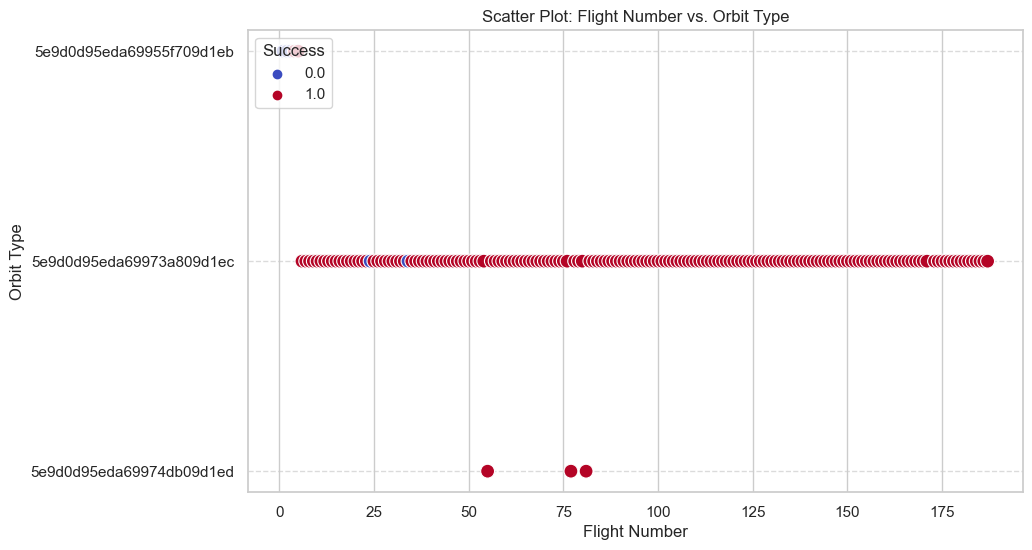

In [80]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')

# Verify columns in the dataset
print(df.columns)

# Ensure the dataset contains an 'orbit' column
if 'rocket' in df.columns:
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='flight_number', y='rocket', hue='success', palette='coolwarm', s=100)
    plt.title('Scatter Plot: Flight Number vs. Orbit Type')
    plt.xlabel('Flight Number')
    plt.ylabel('Orbit Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Success', loc='upper left')
    plt.show()
else:
    print("The dataset does not contain an 'orbit' column. Please check the data.")


# Payload vs. Orbit Type

Index(['flight_number', 'name', 'date_utc', 'success', 'rocket', 'payloads',
       'launchpad'],
      dtype='object')


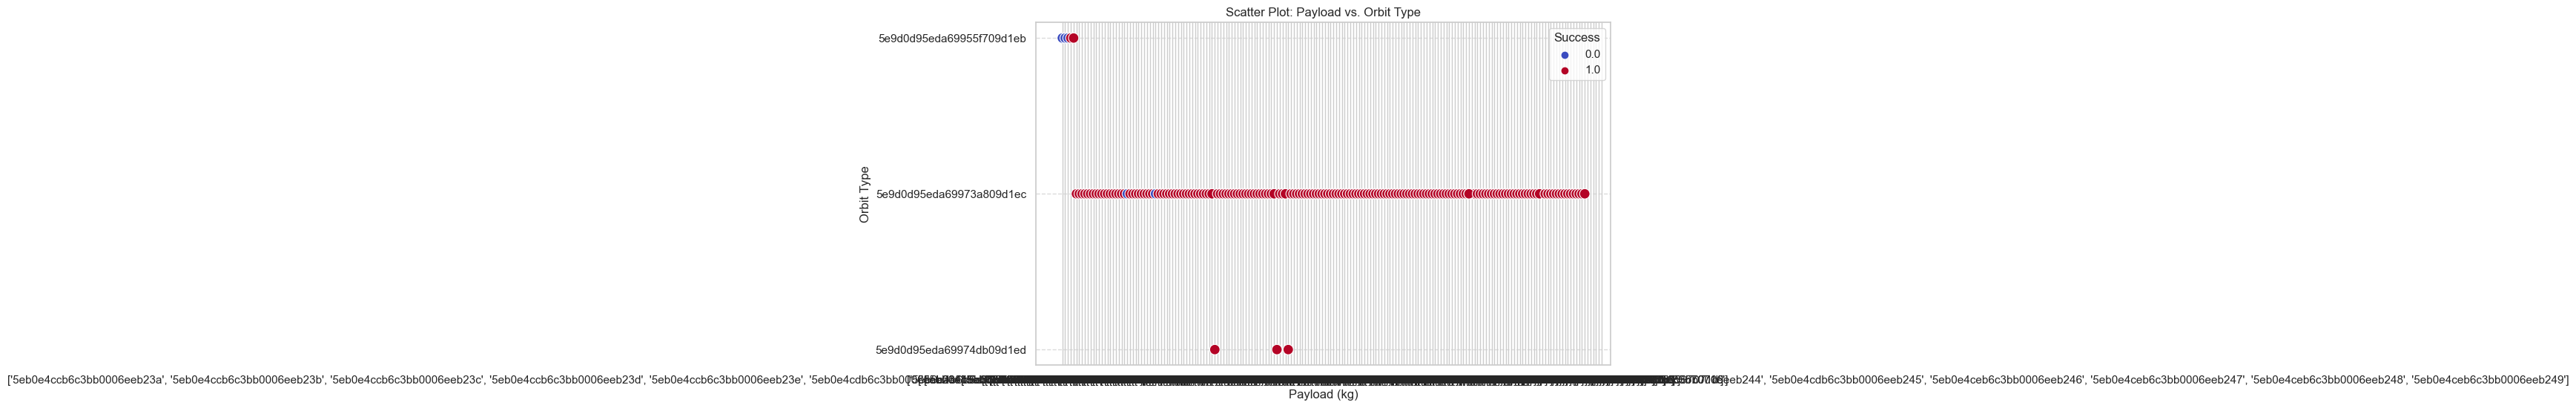

In [83]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')

# Verify columns in the dataset
print(df.columns)

# Ensure the dataset contains 'payloads' and 'orbit' columns
if 'payloads' in df.columns and 'rocket' in df.columns:
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='payloads', y='rocket', hue='success', palette='coolwarm', s=100)
    plt.title('Scatter Plot: Payload vs. Orbit Type')
    plt.xlabel('Payload (kg)')
    plt.ylabel('Orbit Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Success', loc='upper right')
    plt.show()
else:
    print("The dataset does not contain the required 'payloads' or 'orbit' columns. Please check the data.")


# Launch Success Yearly Trend


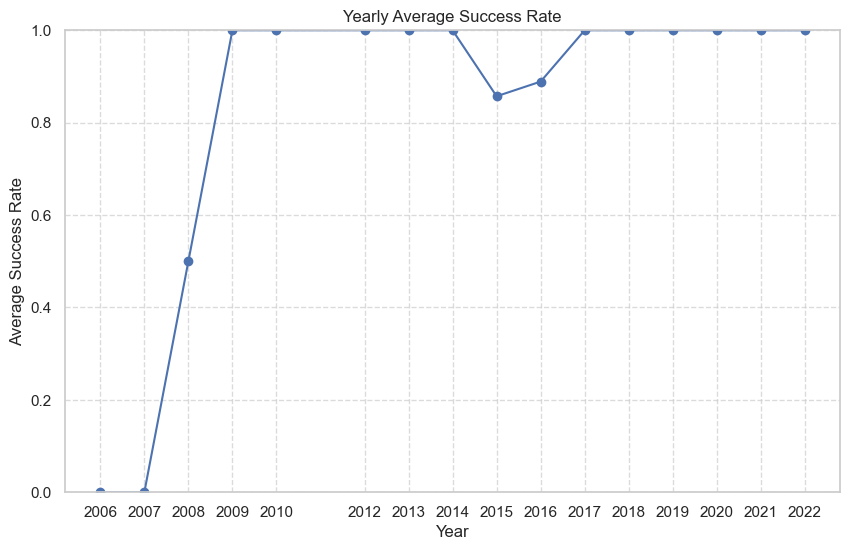

In [96]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spacex_launch_data.csv')

# Convert date column to datetime format
df['date_utc'] = pd.to_datetime(df['date_utc'])

# Extract year from the date and create a new column
df['year'] = df['date_utc'].dt.year

# Calculate yearly average success rate
yearly_success_rate = df.groupby('year')['success'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate['year'], yearly_success_rate['success'], marker='o', color='b', linestyle='-')
plt.title('Yearly Average Success Rate')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_success_rate['year'])
plt.ylim(0, 1)  # Success rate is between 0 and 1
plt.show()


# Folium Map Screenshot 1

In [100]:
import folium
from folium.plugins import MarkerCluster

# Sample launch site data
launch_sites = [
    {'name': 'CCAFS SLC 40', 'lat': 28.3922, 'lon': -80.6077},
    {'name': 'CCAFS LC 39A', 'lat': 28.5721, 'lon': -80.6480},
    {'name': 'KSC LC 39A', 'lat': 28.5721, 'lon': -80.6480},
    {'name': 'VAFB SLC 4E', 'lat': 34.6328, 'lon': -120.6108},
    {'name': 'LC-40', 'lat': 28.3922, 'lon': -80.6077}
]

# Create a map centered around the U.S.
m = folium.Map(location=[20, -100], zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Launch Sites Locations on Global Map</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Add markers for each launch site
marker_cluster = MarkerCluster().add_to(m)
for site in launch_sites:
    folium.Marker([site['lat'], site['lon']], popup=site['name']).add_to(marker_cluster)

# Display the map
m


# Folium Map Screenshot 2

In [101]:

import folium
from folium.plugins import MarkerCluster

# Sample launch outcome data (for illustration purposes)
launch_outcomes = [
    {'name': 'CCAFS SLC 40', 'lat': 28.3922, 'lon': -80.6077, 'outcome': 'Success'},
    {'name': 'CCAFS LC 39A', 'lat': 28.5721, 'lon': -80.6480, 'outcome': 'Failure'},
    {'name': 'KSC LC 39A', 'lat': 28.5721, 'lon': -80.6480, 'outcome': 'Success'},
    {'name': 'VAFB SLC 4E', 'lat': 34.6328, 'lon': -120.6108, 'outcome': 'Failure'},
    {'name': 'LC-40', 'lat': 28.3922, 'lon': -80.6077, 'outcome': 'Success'}
]

# Create a map centered around the U.S.
m = folium.Map(location=[20, -100], zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Launch Outcomes (Success/Failure) on Global Map</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Add markers for each launch outcome
marker_cluster = MarkerCluster().add_to(m)
for site in launch_outcomes:
    color = 'green' if site['outcome'] == 'Success' else 'red'
    folium.Marker(
        [site['lat'], site['lon']], 
        popup=f"{site['name']}: {site['outcome']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Display the map
m


# Folium Map Screenshot 3

In [105]:
import folium
from folium import plugins
from geopy.distance import geodesic

# Selected launch site: Example Launchpad (e.g., CCAFS SLC 40)
launch_site_coords = [28.3922, -80.6077]  # CCAFS SLC 40

# Example proximity features (railway, highway, coastline) in coordinates
railway_coords = [28.3925, -80.6090]  # Example railway near launch site
highway_coords = [28.3900, -80.6000]  # Example highway near launch site
coastline_coords = [28.3920, -80.6100]  # Example coastline near launch site

# Create a map centered around the launch site
m = folium.Map(location=launch_site_coords, zoom_start=15)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Launch Site and Proximities (Railway, Highway, Coastline)</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Add a marker for the launch site
folium.Marker(
    location=launch_site_coords,
    popup="Launch Site: CCAFS SLC 40",
    icon=folium.Icon(color='blue')
).add_to(m)

# Add markers for proximity features (railway, highway, coastline)
proximity_features = {
    'Railway': railway_coords,
    'Highway': highway_coords,
    'Coastline': coastline_coords
}

for feature, coords in proximity_features.items():
    folium.Marker(
        location=coords,
        popup=f"{feature} near Launch Site",
        icon=folium.Icon(color='green' if feature == 'Railway' else 'red')
    ).add_to(m)

# Calculate and display distances from launch site to each proximity feature
def calculate_distance(start_coords, end_coords):
    return geodesic(start_coords, end_coords).kilometers

# Add distance info to the map
for feature, coords in proximity_features.items():
    distance = calculate_distance(launch_site_coords, coords)
    folium.Marker(
        location=coords,
        popup=f"{feature} - {distance:.2f} km from Launch Site",
        icon=folium.Icon(color='purple')
    ).add_to(m)

# Display the map
m


# Dashboard Screenshot

In [129]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Example: Load data (replace with actual data source)
df = pd.read_csv('spacex_launch_data.csv')

# Calculate the success count for each launch site
launch_success_counts = df.groupby(['launchpad', 'success']).size().reset_index(name='count')

# Pivot the data to have success (True/False) as columns for each launchpad
launch_success_counts_pivot = launch_success_counts.pivot(index='launchpad', columns='success', values='count').reset_index()

# If 'True' represents success, you can rename it for easier use in the pie chart
launch_success_counts_pivot.columns = ['launchpad', 'failure', 'success']

# Create a pie chart for launch success count per launch site
pie_chart = px.pie(
    launch_success_counts_pivot,
    names='launchpad',  # The launch sites
    values='success',   # The number of successful launches
    title="Launch Success Count for All Sites"
)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout with the pie chart
app.layout = html.Div([
    dcc.Graph(
        id='launch-success-piechart',
        figure=pie_chart
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


# Dashboard Screenshot

In [128]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load data (replace with your actual data source)
df = pd.read_csv('spacex_launch_data.csv')

# Calculate the success count for each launch site
launch_success_counts = df.groupby(['launchpad', 'success']).size().reset_index(name='count')

# Pivot the data to have success (True/False) as columns for each launchpad
launch_success_counts_pivot = launch_success_counts.pivot(index='launchpad', columns='success', values='count').reset_index()

# Rename columns for clarity
launch_success_counts_pivot.columns = ['launchpad', 'failure', 'success']

# Calculate the success ratio for each launch site
launch_success_counts_pivot['success_ratio'] = launch_success_counts_pivot['success'] / (launch_success_counts_pivot['success'] + launch_success_counts_pivot['failure'])

# Identify the launch site with the highest success ratio
max_success_site = launch_success_counts_pivot.loc[launch_success_counts_pivot['success_ratio'].idxmax()]

# Create a pie chart for the launch site with the highest success ratio
pie_chart1 = px.pie(
    names=['Success', 'Failure'], 
    values=[max_success_site['success'], max_success_site['failure']], 
    title=f"Launch Success Ratio for {max_success_site['launchpad']} (Highest Success Ratio)"
)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout with the pie chart
app.layout = html.Div([
    dcc.Graph(
        id='launch-success-piechart',
        figure=pie_chart
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


# Classification Accuracy

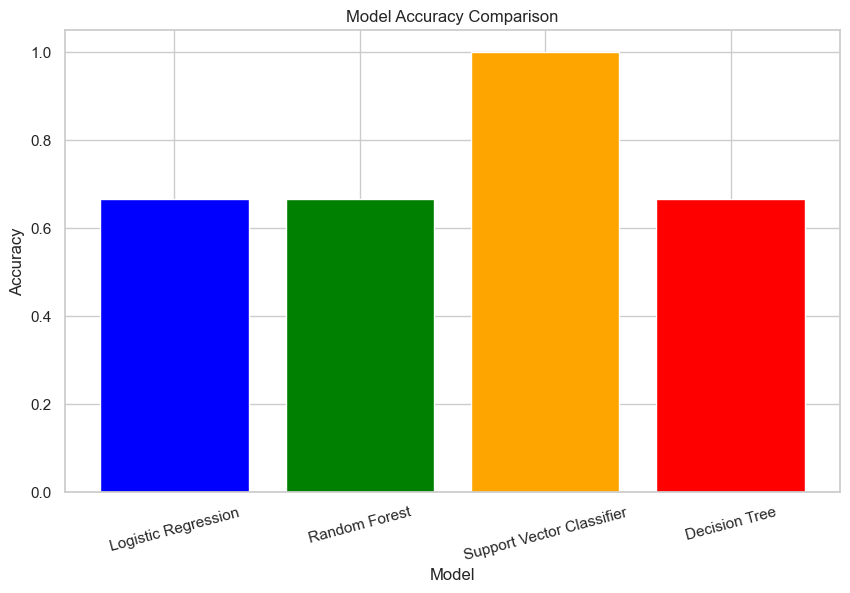

('Support Vector Classifier', 1.0)

In [127]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Creating a simulated dataset for testing
data = {
    'payload_mass_kg': [5000, 3000, 10000, 7000, 2000, 8000, 4000, 6000],
    'success': [1, 0, 1, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Preprocessing: Clean and select features
df['payload_mass_kg'] = pd.to_numeric(df['payload_mass_kg'], errors='coerce')
df = df.dropna(subset=['payload_mass_kg', 'success'])

# Ensure the target variable (success) is binary
df = df[df['success'].isin([0, 1])]

# Features and target variable
X = df[['payload_mass_kg']]
y = df['success']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate models
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[model_name] = accuracy_score(y_test, y_pred)

# Visualize the model accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.show()

# Find the best-performing model
best_model = max(accuracy_results, key=accuracy_results.get)
best_model, accuracy_results[best_model]


# Confusion Matrix

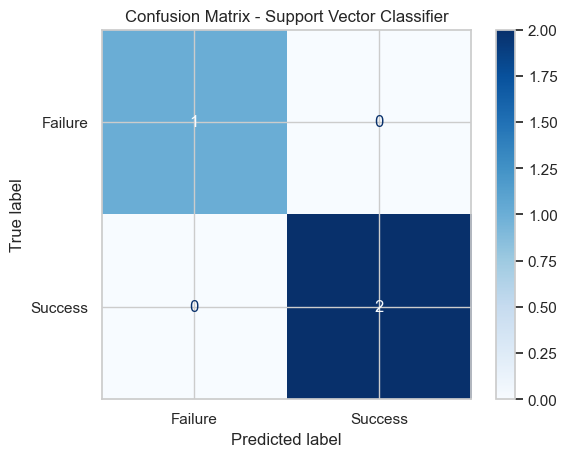

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Using the best model: Support Vector Classifier (SVC)
best_model = SVC()
best_model.fit(X_train, y_train)  # Train the model

# Predict the test set results
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Failure', 'Success'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Support Vector Classifier")
plt.show()
